# Homework 02 of EPS 88

## GPS data and subsidence of the San Joaquin Valley

The example data we are going to use today is from continuously operating high-precision GPS stations that are operated by UNAVCO which is a non-profit university-governed consortium that facilitates geoscience research and education using geodesy. 

Let's get an introduction here: https://youtu.be/yxLMk120vMU

This data viewer gives a great summary velocity overview of the available GPS data: https://www.unavco.org/software/visualization/GPS-Velocity-Viewer/GPS-Velocity-Viewer.html

Let's look at data from a GPS station that is in Visalia California. Visalia is in the San Joaquin Valley between Fresno and Bakersfield.

https://www.unavco.org/instrumentation/networks/status/pbo/overview/P566

Today we will be focused on putting tools to use that we have used before with a couple new tricks related to dealing with time-series data. 

## Using pandas to import and filter data
From the first week of class we have used the pandas library to import and filter data. The DataFrame object has been the most common way we have dealt with data.

In [1]:
import pandas as pd

One of the strengths of pandas is its ability to read and write different data types. For example, we have used the `pd.read_csv()` function to import .csv files throughout the course. This function can either be pointed to a file that is one your computer or a file that is posted on the internet. There are some online databases where you can use a url to access data of your choosing using a special format (API). We took this approach to get our birthquakes earlier in the course.

Let's import daily data since 2005 for the Visalia California GPS station. The data is in the North American tectonic plate (NAM14) reference frame which means that it takes the interior eastern part of North America functions as a fixed and stable point. 

In [2]:
# P566_GPS_data = pd.read_csv('data/P566.cwu.nam14.csv')

Whoops. There was an error. I kept this error in here as a reminder that I get errors all of the time. Remember that the errors are informative, but can also be a bit cryptic. In this case, it says "Expected 2 fields in line 10, saw 4." So it seems like there is a mismatch between the number of columns it is expecting and the number that there are. 

Let's look at the file.

It turns out that there are a bunch of header lines and the header row that contains the column names needs to be specified (`header = 11`).

In [3]:
P566_GPS_data = pd.read_csv('../data/P566.cwu.nam14.csv', header=11)
P566_GPS_data.columns = P566_GPS_data.columns.str.strip()

We know how to take a peak at a DataFrame by applying the `.head()` function.

In [4]:
P566_GPS_data.head()

,Date,North (mm),East (mm),Vertical (mm),North Std. Deviation (mm),East Std. Deviation (mm),Vertical Std. Deviation (mm),Quality,Unnamed: 8
0,2005-11-16,0.00,0.00,0.00,2.11,1.71,7.70,repro,NaN
1,2005-11-17,0.26,-1.83,0.44,2.02,1.61,7.36,repro,NaN
2,2005-11-18,0.03,-0.64,5.36,2.00,1.62,7.35,repro,NaN
3,2005-11-19,0.38,-0.86,4.61,2.02,1.62,7.37,repro,NaN
4,2005-11-20,-0.15,-1.14,-3.28,2.04,1.65,7.46,repro,NaN


We have done a lot where we have used extracted data from a single column. We have used the syntax `DataFrameName['column_name]`. It can be helpful to look at the available columns:

In [5]:
P566_GPS_data.columns

Index(['Date', 'North (mm)', 'East (mm)', 'Vertical (mm)',
       'North Std. Deviation (mm)', 'East Std. Deviation (mm)',
       'Vertical Std. Deviation (mm)', 'Quality', 'Unnamed: 8'],
      dtype='object')

Let first look at how this point is moving north with respect to stable North America.

In [6]:
P566_GPS_data['North (mm)'].describe()

count    6305.000000
mean       81.556114
std        47.225855
min        -0.860000
25%        41.690000
50%        81.630000
75%       120.950000
max       167.900000
Name: North (mm), dtype: float64

By themselves these data are pretty cool. It looks like Visalia has moved north relative to stable North America by ~170 mm (17 cm) over the past 18 years (the data starts in November 2005).

### Pandas timeseries

Pandas is good at dealing with time series data. We need to make sure that the data type of the 'Date' column is a time series

In [7]:
P566_GPS_data['Date'][0]

'2005-11-16'

In [8]:
type(P566_GPS_data['Date'][0])

str

Right now, pandas thinks that the values in the data column are strings (a sequence of characters) rather than datetime values. We can convert them to be datetime values using `pd.to_datetime`.

In [9]:
P566_GPS_data['Date'] = pd.to_datetime(P566_GPS_data['Date'])

In [10]:
P566_GPS_data['Date'][0]

Timestamp('2005-11-16 00:00:00')

In [11]:
type(P566_GPS_data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

## Making plots using `matplotlib`

We have relied on `matplotlib` to make plots throughout the course which we have imported as follows:

In [12]:
import matplotlib.pyplot as plt

### Plotting with pandas

One thing that you can do using pandas once you have imported matplotlib that we haven't done very much is use built-in plotting functions on the DataFrame. In this case we can use `.plot`.

<Axes: xlabel='Date'>

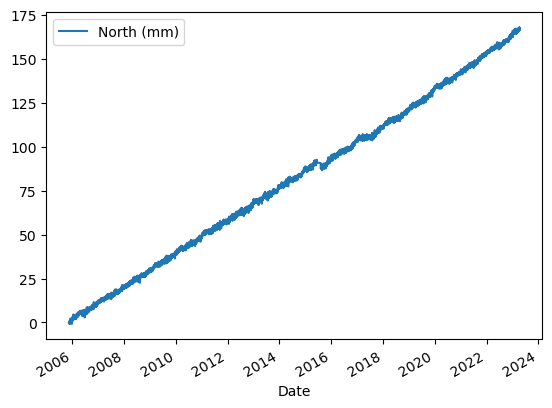

In [13]:
P566_GPS_data.plot(x='Date', y='North (mm)')

### Plotting using plt functions

We have made a number of different plot types using `matplotlib` such as `plt.hist()`, `plt.plot()` and `plt.scatter()`. When dealing with timedate values, one can use `plt.plot()`, but not `plt.scatter()`. 

Let's visualize both the north and east columns using `plt.plot()`. The data are from every day between Nov. 16, 2005 and now.

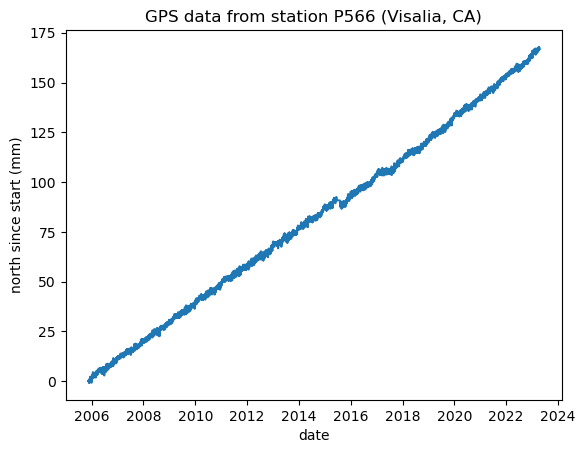

In [14]:
plt.figure()
plt.plot(P566_GPS_data['Date'],P566_GPS_data['North (mm)'])
plt.ylabel('north since start (mm)')
plt.xlabel('date')
plt.title('GPS data from station P566 (Visalia, CA)')
plt.show()

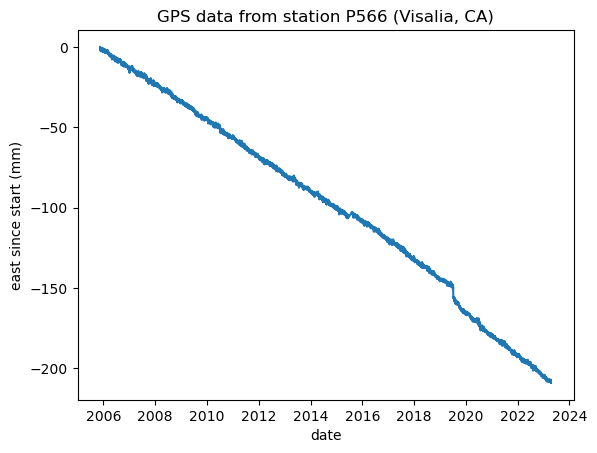

In [15]:
plt.figure()
plt.plot(P566_GPS_data['Date'],P566_GPS_data['East (mm)'])
plt.ylabel('east since start (mm)')
plt.xlabel('date')
plt.title('GPS data from station P566 (Visalia, CA)')
plt.show()

What is going on with that drop midway through 2019? Let's take a look. I played around with what values were zoomed in that drop and found that `[4900:4950]` gave a good zoom-in:

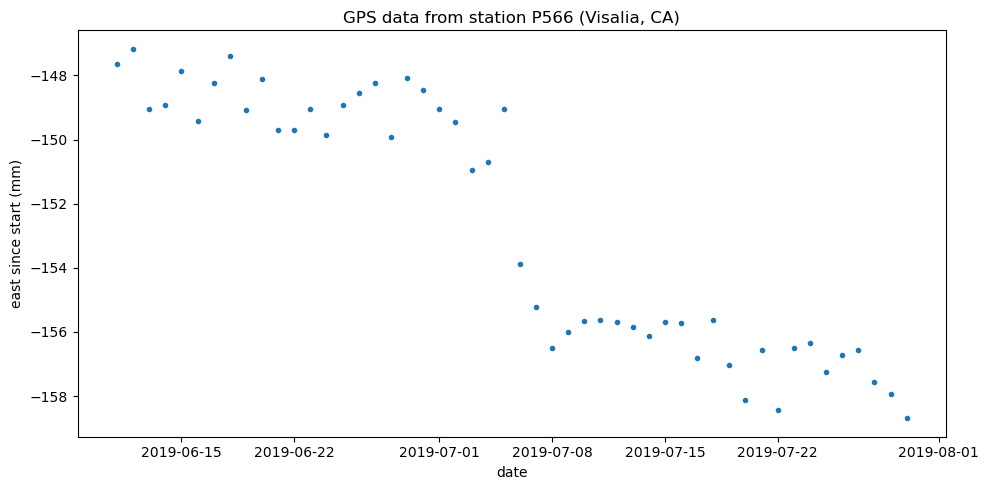

In [16]:
plt.figure(figsize=(10,5))
plt.plot(P566_GPS_data['Date'][4900:4950],P566_GPS_data['East (mm)'][4900:4950],'.')
plt.ylabel('east since start (mm)')
plt.xlabel('date')
plt.title('GPS data from station P566 (Visalia, CA)')
plt.tight_layout()
plt.show()

What happened on July 6, 2019?

https://earthquake.usgs.gov/earthquakes/eventpage/ci38457511/executive

![alt text](https://static.temblor.net/wp-content/uploads/2016/05/eastern-california-21.jpg)

## Calculations using `numpy` and `scipy`

We have used both the `numpy` and `scipy` libraries of functions to make numerical and statistical calculations. In particular we have put the numpy array data structure to work for us.

In [17]:
import numpy as np

## Fitting a line with scikit-learn

Scikit-learn has a function called `LinearRegression` that can be used to calculate best fit lines using the .fit() method. We have used this to fit lines to data in the past.

We can also consider higher order curves by using the `PolynomialFeatures` function in scikit-learn. 

This function can be used to transform the data into a higher order polynomial space and then use the `LinearRegression` function to fit a line to the transformed data.

We can calculate days by making a new column in the data frame that is the 'date' value minus the initial date. This will be the number of days since the first date in the data set (Nov. 16 2005). 

In [18]:
P566_GPS_data['days'] = (P566_GPS_data['Date'] - P566_GPS_data['Date'][0])/np.timedelta64(1,'D')

Let's take a look at our DataFrame and make sure it has a new column `days` and that the column looks good.

In [19]:
P566_GPS_data.head()

,Date,North (mm),East (mm),Vertical (mm),North Std. Deviation (mm),East Std. Deviation (mm),Vertical Std. Deviation (mm),Quality,Unnamed: 8,days
0,2005-11-16,0.00,0.00,0.00,2.11,1.71,7.70,repro,NaN,0.0
1,2005-11-17,0.26,-1.83,0.44,2.02,1.61,7.36,repro,NaN,1.0
2,2005-11-18,0.03,-0.64,5.36,2.00,1.62,7.35,repro,NaN,2.0
3,2005-11-19,0.38,-0.86,4.61,2.02,1.62,7.37,repro,NaN,3.0
4,2005-11-20,-0.15,-1.14,-3.28,2.04,1.65,7.46,repro,NaN,4.0


Now we can do a linear regression between the days (`P566_GPS_data['days']`) and the distance traveled north (`P566_GPS_data[' North (mm)']`)

In [20]:
from sklearn.linear_model import LinearRegression
model_north = LinearRegression()
model_north.fit(P566_GPS_data[['days']].values,P566_GPS_data['North (mm)'].values)

LinearRegression()

We can get the best fitting slope and intercept of the line using the `.coef_` and `.intercept_` attributes of the `LinearRegression` object.

In [21]:
slop, intercept = model_north.coef_[0], model_north.intercept_

In [22]:
print(f'The slope is {slop:.2f} and the intercept is {intercept:.2f}')

The slope is 0.03 and the intercept is 0.25


**What are the units of this slope?**

*write your answer here*

 ### Make a plot of prediction

**Plot a best-fit line for the data.** *Recall that you can use model.predict() to predict the values of the best-fit line.*

**Calculate and plot the residual.** *Recall that the residual is the difference between the actual data and the values obtained with the linear model.*

**Use the same function to predict how far north (relative to stable North America) the Visalia station will go in the next 10 years.** *There are 365.25 days in a year.*

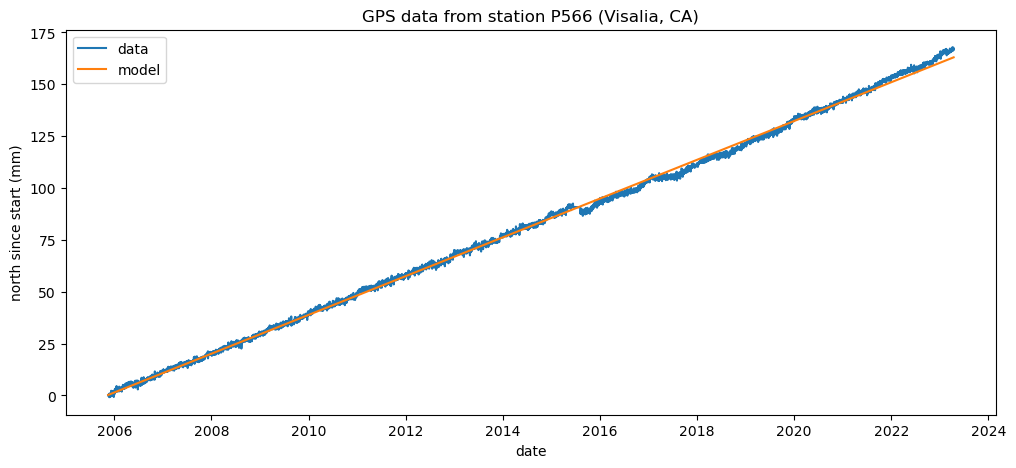

In [23]:
y_pred = model_north.predict(P566_GPS_data['days'].values.reshape(-1,1))

plt.figure(figsize=(12, 5))
plt.plot(P566_GPS_data['Date'],P566_GPS_data['North (mm)'],label='data')
plt.plot(P566_GPS_data['Date'],y_pred,label='model')
plt.ylabel('north since start (mm)')
plt.xlabel('date')
plt.title('GPS data from station P566 (Visalia, CA)')
plt.legend()
plt.show()


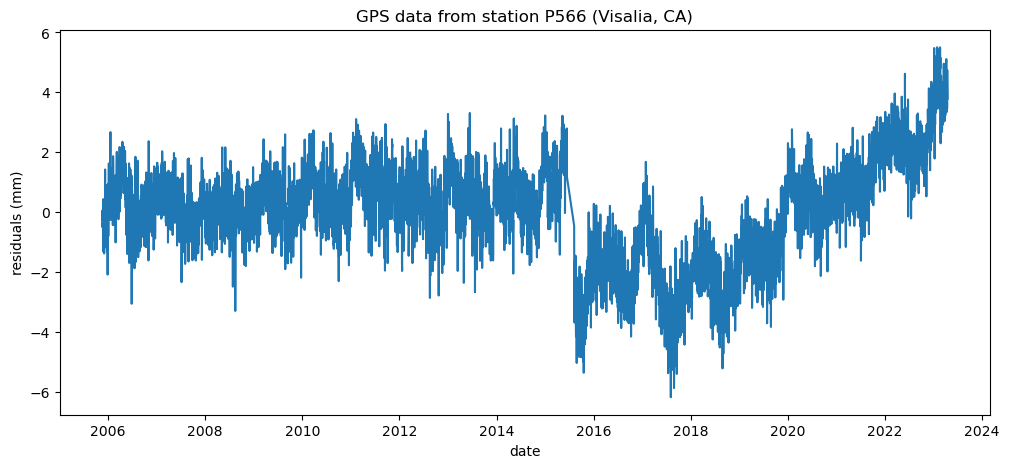

In [24]:
residuals = P566_GPS_data['North (mm)'] - y_pred

plt.figure(figsize=(12, 5))
plt.plot(P566_GPS_data['Date'],residuals)
plt.ylabel('residuals (mm)')
plt.xlabel('date')
plt.title('GPS data from station P566 (Visalia, CA)')
plt.show()


### Evaluating the model using $R^{2}$

We'd also like to know who well this model fits our data (i.e. how correlated the data are). The $R^{2}$ correlation coefficient can be helpful in this regard. $R^{2}$ is zero for uncorrelated data, and 1 for perfectly linear data (so no misfit between the model line and data). 
Let's calculate the $R^{2}$ value for our model.
Recall that the $R^{2}$ value is calculated as follows:

$$R^{2} = 1 - \frac{\sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}{\sum_{i=1}^{n} (y_{i} - \bar{y})^{2}}$$

where $y_{i}$ is the actual data, $\hat{y}_{i}$ is the predicted data, and $\bar{y}$ is the mean of the actual data.

In [25]:
y = P566_GPS_data['North (mm)']
y_pred = model_north.predict(P566_GPS_data['days'].values.reshape(-1,1))

R2 = 1 - np.sum((y - y_pred)**2)/np.sum((y - np.mean(y))**2)

print(f'The R^2 value is {R2:.6f}')

The R^2 value is 0.998779


### Defining a function

When you may be doing a calculation more than once it is a good idea to define a function. Let's define a function that will take an east magnitude and a north magnitude and return a direction between 0 and 360.

In [26]:
def GPS_direction(east_magnitude, north_magnitude):
    direction_rad = np.arctan2(east_magnitude, north_magnitude)
    direction = np.rad2deg(direction_rad) % 360
    return direction

In [27]:
GPS_direction(0,-1)

180.0

**Calculate the slope for the east data. Use this slope and the slope for the north data to calculate the direction of the motion of the station using the `GPS_direction` function.**

In [28]:
model_east = LinearRegression()
model_east.fit(P566_GPS_data['days'].values.reshape(-1,1),P566_GPS_data['East (mm)'].values)

slop_east, intercept_east = model_east.coef_[0], model_east.intercept_

print(f'The slope is {slop_east:.2f} and the intercept is {intercept_east:.2f}')

The slope is -0.03 and the intercept is 3.79


In [29]:
slop_north, intercept_north = model_north.coef_[0], model_north.intercept_

direction = GPS_direction(slop_east, slop_north)

print(f'The direction is {direction:.2f} degrees')

The direction is 308.52 degrees


## Making a map with `cartopy`

At the start of the course, we made a number of maps using the `cartopy` library. I have put in code below that will make a map showing the location of the P566 GPS station. I put in a number of bells and whistles including using terrain imagery tiles from Stamen and putting on text that labels the station location.

Let's define variables giving the latitude and longitude of the P566 GPS station.

In [30]:
P566_lat = 36.32445
P566_lon = -119.22929

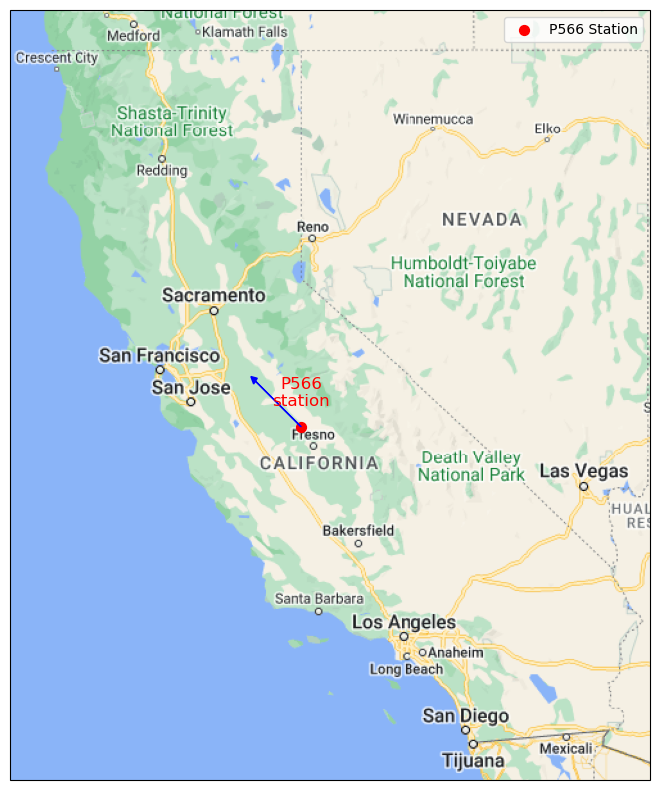

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

# Replace these variables with your station's longitude and latitude
P566_lon = -120.0  # Example longitude of station P566
P566_lat = 37.0    # Example latitude of station P566

# Add a background image from Google Maps
tiles = cimgt.GoogleTiles()

# Set up the map
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=tiles.crs)
ax.set_extent((-125, -114, 32, 42.5))  # Set the geographical extent (lon_min, lon_max, lat_min, lat_max)

# Instread of adding features, we add the Google Maps image
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.STATES)

# Add the Google Maps image to the map
ax.add_image(tiles, 6) # The number 6 is the zoom level. The higher the number, the closer in you zoom

# Plot the station's location
ax.scatter(P566_lon, P566_lat, transform=ccrs.PlateCarree(), color='red', s=50, label='P566 Station')

# Annotate the station with its name
ax.text(P566_lon, P566_lat, 'P566\nstation\n', transform=ccrs.PlateCarree(),
        color='red', horizontalalignment='center', verticalalignment='bottom', size=12)

# Annotation for the direction of motion using an arrow
ax.arrow(P566_lon, P566_lat, np.sin(np.deg2rad(direction)), np.cos(np.deg2rad(direction)), head_width=0.1, head_length=0.1, fc='blue', ec='blue', transform=ccrs.PlateCarree())

plt.legend()
plt.show()


### Plot the vertical component of the GPS time-series

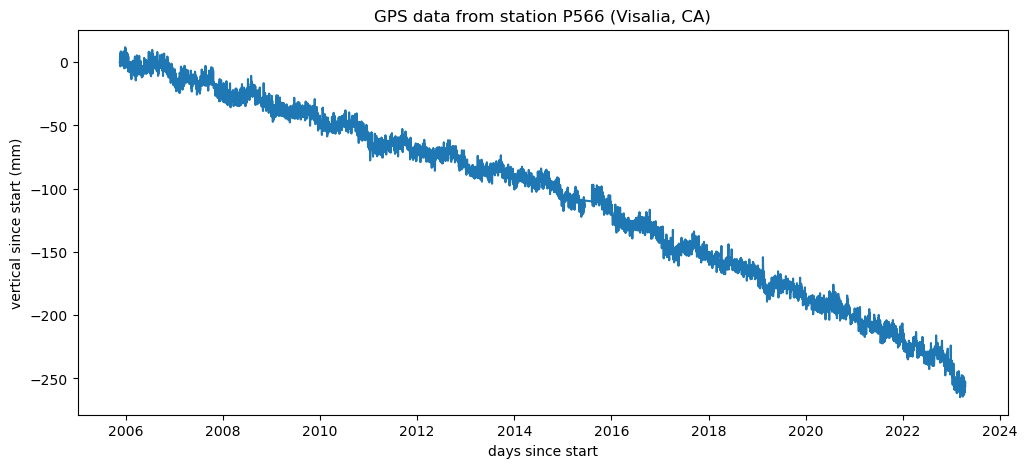

In [32]:
plt.figure(figsize=(12, 5))
plt.plot(P566_GPS_data['Date'],P566_GPS_data['Vertical (mm)'])
plt.ylabel('vertical since start (mm)')
plt.xlabel('days since start')
plt.title('GPS data from station P566 (Visalia, CA)')
plt.show()

**What do these data show? What is happening to the land surface? Why?**

https://earthobservatory.nasa.gov/images/89761/san-joaquin-valley-is-still-sinking

https://www.earthdate.org/californias-sinking-valley

Let's look at a subset of the data for the past 5 years between 2018-01-01 and 2023-01-01. We have done a lot of this filtering using pandas. However, the syntax is hard to remember.

It can be helpful to remember how this is actually working under the hood. When we are passing in a conditional statement like `P566_GPS_data['Date'] >= '2006-01-01'` we are asking pandas to tell us, at every value in the `P566_GPS_data['Date']` column is it true or false that the date is greater than 2018-01-01? 

In [33]:
P566_GPS_data['Date'] >= '2018-01-01'

0       False
1       False
2       False
3       False
4       False
        ...  
6300     True
6301     True
6302     True
6303     True
6304     True
Name: Date, Length: 6305, dtype: bool

The result is a list of true/false values. We then use these true/false values to filter the values in the DataFrame only returning those that are true. We can link multiple conditionals together with the `&` symbol such as in the example below `(P566_GPS_data['Date'] >= '2006-01-01') & (P566_GPS_data['Date'] < '2010-01-01')`.

In [34]:
P566_GPS_18_23 = P566_GPS_data[(P566_GPS_data['Date'] >= '2018-01-01') & (P566_GPS_data['Date'] < '2023-01-01')]
P566_GPS_18_23.head()

,Date,North (mm),East (mm),Vertical (mm),North Std. Deviation (mm),East Std. Deviation (mm),Vertical Std. Deviation (mm),Quality,Unnamed: 8,days
4374,2018-01-01,111.65,-132.47,-156.00,1.86,1.55,6.83,repro,NaN,4429.0
4375,2018-01-02,112.04,-132.45,-158.25,1.87,1.54,6.79,repro,NaN,4430.0
4376,2018-01-03,111.85,-132.73,-155.05,1.88,1.55,6.83,repro,NaN,4431.0
4377,2018-01-04,110.52,-131.16,-160.25,1.90,1.56,6.91,repro,NaN,4432.0
4378,2018-01-05,111.68,-132.28,-156.70,1.87,1.54,6.79,repro,NaN,4433.0


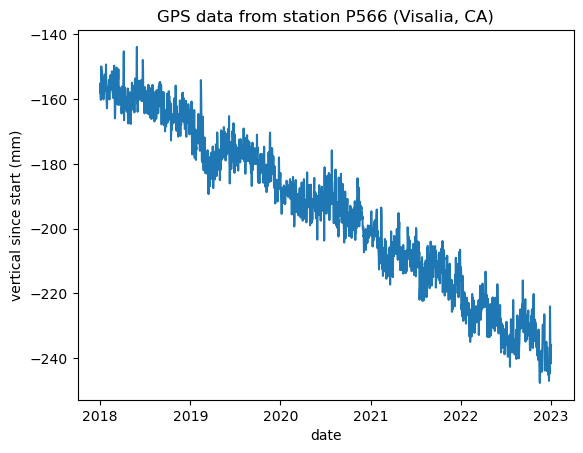

In [35]:
plt.plot(P566_GPS_18_23['Date'],P566_GPS_18_23['Vertical (mm)'])
plt.ylabel('vertical since start (mm)')
plt.xlabel('date')
plt.title('GPS data from station P566 (Visalia, CA)')
plt.show()

## Estimating the slope and associated uncertainty

Like we did for the directional data when estimating the median and its uncertainty, we can get an estimate of the uncertainty of slope of the subsidence by bootstrap resampling the data a large number of times, and calculating the regression line through each bootstrapped dataset. This chapter in Inferential Thinking provides good explanations for this approach: https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html

We can collect all the slopes and plot their empirical histogram. We will use the `.sample()` function on the `P566_GPS_06_09` DataFrame and grab as many samples as the DataFrame is long (`len(P566_GPS_06_09)`) and replace the values each time they are sample (`replace=True`).

> The Bootstrap: Resampling from the Sample 

> What we do have is a large random sample from the population. As we know, a large random sample is likely to resemble the population from which it is drawn. This observation allows data scientists to lift themselves up by their own bootstraps: the sampling procedure can be replicated by sampling from the sample.

We need to put together a few different programming elements to make this work. Let's break them down.
- make a placeholder list that we with subsequently append values to: `slopes_06_09 = []`
- resample the DataFrame using `.sample`
- calculate a linear regression using `np.polyfit()`
- extract the slope which is the first element of what is returned from `np.polyfit()`
- append that value to the `slopes_06_09` list

In [36]:
slopes_18_23 = []

resample = P566_GPS_18_23.sample(n=len(P566_GPS_18_23),replace=True)
model_vertical = LinearRegression()
model_vertical.fit(resample['days'].values.reshape(-1,1),resample['Vertical (mm)'].values)
slop = model_vertical.coef_[0]
print(f'The slope is {slop:.2f} mm/day')

slopes_18_23.append(slop)

The slope is -0.05 mm/day


In [37]:
slopes_18_23

[-0.04635289530599001]

But what we did above just does the resampling and slope fitting once. The idea of the bootstrap is that we are going to do it many many times.

To do this we will use a `for` loop. To loop through a set of code a specified number of times, we can use the `range()` function,
The `range()` function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and ends at a specified number. Anything that is indented under the for loop will then be repeated for the number of times that are in the range.

In [38]:
for n in range(0,10):
    print(n)

0
1
2
3
4
5
6
7
8
9


For the bootstrap resampling and calculation of slope for the bootstrap resampled data, we want to do it many times. So let's do `for n in range(0,1000):`.  

In [39]:
slopes_18_23 = []

model_vertical = LinearRegression()
for n in range(0,1000):
    resample = P566_GPS_18_23.sample(n=len(P566_GPS_18_23),replace=True)

    model_vertical.fit(resample['days'].values.reshape(-1,1),resample['Vertical (mm)'].values)

    slope = model_vertical.coef_[0]
    slopes_18_23.append(slope)

We will now have a large number of slope values for the bootstrap resampled data. We can visualize them using `plt.hist()`.

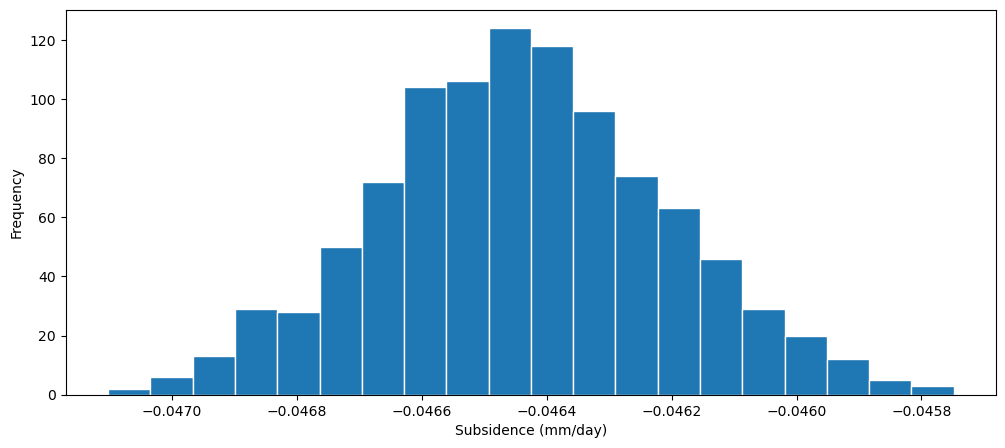

In [40]:
plt.figure(figsize=(12, 5))
plt.hist(slopes_18_23, bins=20, edgecolor='white')
plt.ylabel('Frequency')
plt.xlabel('Subsidence (mm/day)')
plt.show()

**Code for you to write**

**Address the question: Is the rate of land subsidence increasing? Specifically, was the rate of land subsidence greater during the last 5 years (2018-01-01 and 2023-01-01) than it was in the first 5 years of the record (2006-01-01 and 2011-01-01)?** 

To do so:
- Filter the DataFrame to only include those years
- Use the bootstrap method to estimate the slope and its 95 percent confidence bounds (using the `np.percentile` function will help)
- Compare the the slopes between the two age ranges. Which one appears to be greater? Is this results significant or do they have overlapping confidence bounds? Plotting histograms of the bootstrap slope values is a good way to make this comparison.

*Bonus: fit a linear regression to the whole time series, calculate and plot the residuals. What does the residual correspond to?* 

In [41]:
P566_GPS_06_11 = P566_GPS_data[(P566_GPS_data['Date'] >= '2006-01-01') & (P566_GPS_data['Date'] < '2011-01-01')]
P566_GPS_06_11.head()

,Date,North (mm),East (mm),Vertical (mm),North Std. Deviation (mm),East Std. Deviation (mm),Vertical Std. Deviation (mm),Quality,Unnamed: 8,days
46,2006-01-01,2.37,-2.75,4.95,2.19,1.80,8.02,repro,NaN,46.0
47,2006-01-02,0.65,-2.49,7.68,2.11,1.68,7.51,repro,NaN,47.0
48,2006-01-03,1.98,-2.50,4.52,2.32,2.02,8.48,repro,NaN,48.0
49,2006-01-04,1.91,-1.75,-0.37,2.26,1.96,8.32,repro,NaN,49.0
50,2006-01-05,2.94,-1.34,-4.20,2.13,1.78,7.71,repro,NaN,50.0


In [42]:
model_06 = LinearRegression()
model_06.fit(P566_GPS_06_11['days'].values.reshape(-1,1),P566_GPS_06_11['Vertical (mm)'].values)
print(f'The slope is {model_06.coef_[0]:.2f} mm/day')

The slope is -0.03 mm/day


In [43]:
P566_GPS_11_16 = P566_GPS_data[(P566_GPS_data['Date'] >= '2011-01-01') & (P566_GPS_data['Date'] < '2016-01-01')]
P566_GPS_11_16.head()

,Date,North (mm),East (mm),Vertical (mm),North Std. Deviation (mm),East Std. Deviation (mm),Vertical Std. Deviation (mm),Quality,Unnamed: 8,days
1872,2011-01-01,47.68,-55.55,-56.53,1.96,1.56,7.18,repro,NaN,1872.0
1873,2011-01-02,48.56,-55.01,-65.94,2.05,1.64,7.46,repro,NaN,1873.0
1874,2011-01-03,48.74,-56.17,-64.03,1.98,1.60,7.29,repro,NaN,1874.0
1875,2011-01-04,48.48,-56.14,-62.31,2.02,1.58,7.23,repro,NaN,1875.0
1876,2011-01-05,50.01,-55.84,-67.32,1.94,1.52,7.00,repro,NaN,1876.0


In [44]:
model_11 = LinearRegression()
model_11.fit(P566_GPS_11_16['days'].values.reshape(-1,1),P566_GPS_11_16['Vertical (mm)'].values)
print(f'The slope is {model_11.coef_[0]:.2f} mm/day')

The slope is -0.03 mm/day


What is the main economic activity around P566? And what resources does that activity require?

What does the vertical component of the GPS time-series tell us about the land movement in the San Joaquin Valley?

What are the implications of the land subsidence in the San Joaquin Valley?


![alt text](https://upload.wikimedia.org/wikipedia/commons/1/1c/Drought_area_in_California.svg)
